## What's Cooking?

Picture yourself strolling through your local, open-air market... What do you see? What do you smell? What will you make for dinner tonight?

If you're in Northern California, you'll be walking past the inevitable bushels of leafy greens, spiked with dark purple kale and the bright pinks and yellows of chard. Across the world in South Korea, mounds of bright red kimchi greet you, while the smell of the sea draws your attention to squids squirming nearby. India’s market is perhaps the most colorful, awash in the rich hues and aromas of dozens of spices: turmeric, star anise, poppy seeds, and garam masala as far as the eye can see.

Some of our strongest geographic and cultural associations are tied to a region's local foods. This playground competitions asks you to predict the category of a dish's cuisine given a list of its ingredients. 

Acknowledgements
We want to thank Yummly for providing this unique dataset. Kaggle is hosting this playground competition for fun and practice.

In the dataset, we include the recipe id, the type of cuisine, and the list of ingredients of each recipe (of variable length). The data is stored in JSON format. 

An example of a recipe node in train.json:

 {
 "id": 24717,
 "cuisine": "indian",
 "ingredients": [
     "tumeric",
     "vegetable stock",
     "tomatoes",
     "garam masala",
     "naan",
     "red lentils",
     "red chili peppers",
     "onions",
     "spinach",
     "sweet potatoes"
 ]
 },
In the test file test.json, the format of a recipe is the same as train.json, only the cuisine type is removed, as it is the target variable you are going to predict.

In [1]:
### Importing all the necessary librariers ###

import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import seaborn as sns

In [2]:
### Create dataset out of data file for training ###

df_train = pd.read_json("train.json")
df_test = pd.read_json("test.json")

df_train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
### Desribe training dataset ###

df_train.describe(include='all')

,cuisine,id,ingredients
count,39774,39774.000000,39774
unique,20,NaN,39674
top,italian,NaN,"[cold water, lime, sugar, sweetened condensed ..."
freq,7838,NaN,3
mean,NaN,24849.536959,NaN
std,NaN,14360.035505,NaN
min,NaN,0.000000,NaN
25%,NaN,12398.250000,NaN
50%,NaN,24887.000000,NaN
75%,NaN,37328.500000,NaN


### There is 20 unique cuisines in the data set. The most recipes we have from italian cuisine. There are no null values

Text(0.5, 1.0, 'Number of recipes in the dataset')

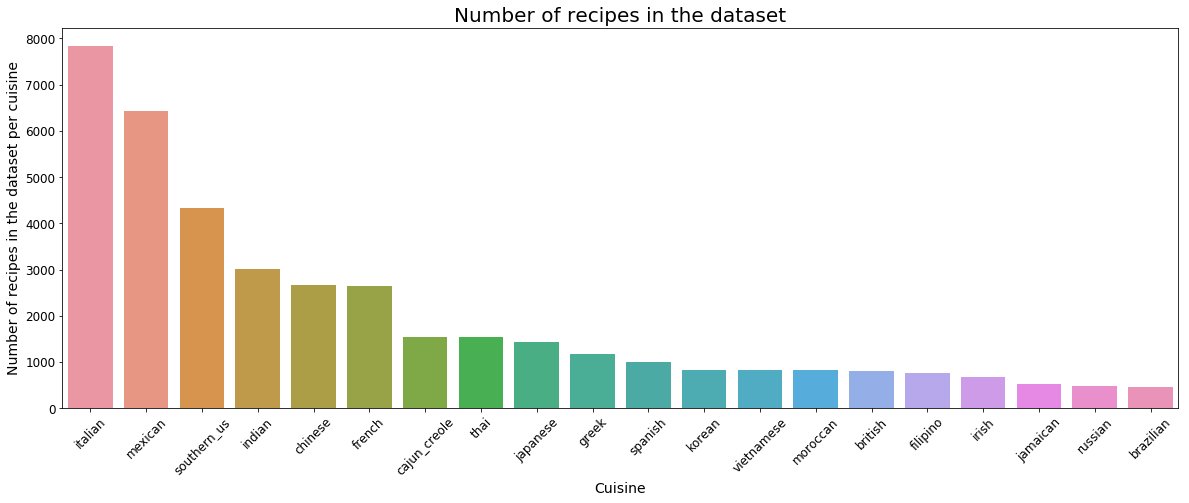

In [6]:
### Desribe training dataset ###

df_train_recipes = df_train.groupby(['cuisine'])['id'].count().to_frame().reset_index().rename(columns={'id':'number_of_recipes'}).sort_values('number_of_recipes', ascending = False)

plt.figure(figsize=(20,7))

ax = sns.barplot(x = df_train_recipes['cuisine'], y = df_train_recipes['number_of_recipes'])
plt.xticks(rotation = 45, size = 12)
plt.xlabel('Cuisine', size = 14)
plt.yticks(size = 12)
plt.ylabel('Number of recipes in the dataset per cuisine', size = 14)

plt.title('Number of recipes in the dataset', size = 20)

### The most recipes we have from Italian and mecian cuisines. The least we have for jamaican, russian and brazilian. 

# Number of ingredients per recipe

In [7]:
number_of_ingred = []
for i in range(len(df_train)):
    ingred = df_train['ingredients'].values[i]
    number_of_ingred.append(len(ingred))
    
df_train['number_of_ingred'] = number_of_ingred

In [8]:
df_train.head()

,cuisine,id,ingredients,number_of_ingred
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,indian,22213,"[water, vegetable oil, wheat, salt]",4
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",20


Text(0.5, 1.0, 'Distribution of Recipe Length')

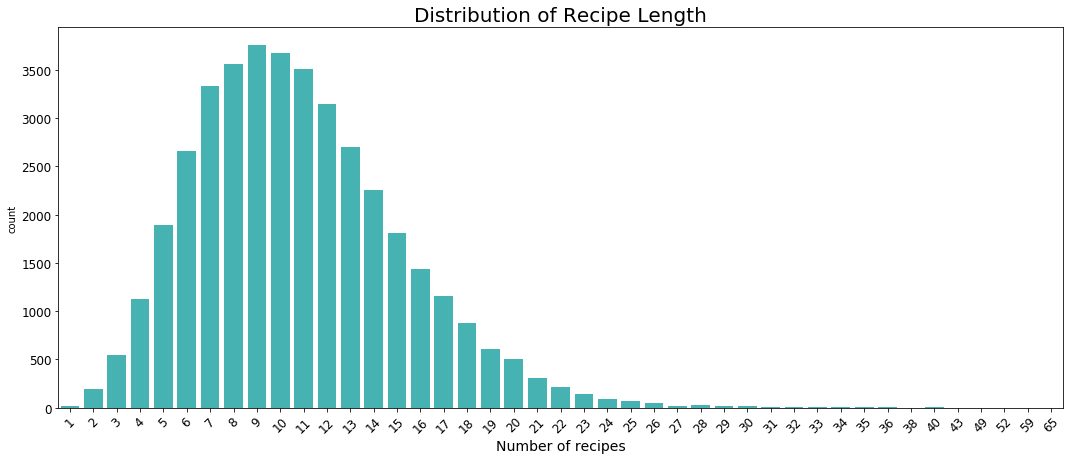

In [9]:
plt.figure(figsize=(18,7))

ax = sns.countplot(df_train['number_of_ingred'], color = '#35c4c4')
plt.xticks(rotation = 45, size = 12)
plt.xlabel('Number of recipes', size = 14)
plt.yticks(size = 12)

plt.title('Distribution of Recipe Length', size = 20)

In [10]:
## Minimum number of ingredients ## 
df_train[df_train['number_of_ingred'] == 1]

,cuisine,id,ingredients,number_of_ingred
940,japanese,4734,[sushi rice],1
2088,vietnamese,7833,[dried rice noodles],1
6787,indian,36818,[plain low-fat yogurt],1
7011,indian,19772,[unsalted butter],1
8181,japanese,16116,[udon],1
8852,thai,29738,[sticky rice],1
8990,indian,41124,[butter],1
10506,mexican,32631,[corn tortillas],1
13178,thai,29570,[grained],1
17804,southern_us,29849,[lemonade concentrate],1


In [11]:
## Maximum number of ingredients ## 

df_train = df_train.sort_values('number_of_ingred', ascending = False)

In [12]:
df_train[df_train['number_of_ingred'] > 40]

,cuisine,id,ingredients,number_of_ingred
15289,italian,3885,"[fettucine, fresh marjoram, minced garlic, oli...",65
30350,brazilian,13430,"[marshmallows, fresh corn, cheddar cheese, shr...",59
26103,mexican,13049,"[vanilla ice cream, lime, garlic powder, zucch...",52
10513,mexican,49282,"[condensed cream of chicken soup, pepper, refr...",49
22906,indian,2253,"[white vinegar, sparkling lemonade, coconut su...",49
31250,italian,29216,"[eggs, warm water, pepper, dried basil, unsalt...",43


In [13]:
df_train[df_train['number_of_ingred'] == 65]['ingredients'].values

array([list(['fettucine', 'fresh marjoram', 'minced garlic', 'olive oil', 'garlic powder', 'large eggs', 'Alfredo sauce', 'vegetable oil', 'cajun seasoning', 'shredded romano cheese', 'basil dried leaves', 'salt', 'cayenne pepper', 'scallions', 'red bell pepper', 'boneless skinless chicken breast halves', 'soba', 'pasta sauce', 'kosher salt', 'milk', 'fresh ginger', 'ground black pepper', 'flour', 'cooked chicken', 'coarse salt', 'lemon', 'diced tomatoes', 'garlic', 'rice vinegar', 'Neufchâtel', 'garlic cloves', 'dried parsley', 'frozen artichoke hearts', 'penne', 'pepper', 'sweet onion', 'part-skim mozzarella cheese', 'parmigiano reggiano cheese', 'basil leaves', 'onion powder', 'red wine vinegar', 'red pepper flakes', 'orzo', 'crushed red pepper', 'all-purpose flour', 'freshly ground pepper', 'sliced mushrooms', 'panko breadcrumbs', 'plum tomatoes', 'fresh basil', 'fresh leav spinach', 'water', 'sun-dried tomatoes', 'ground pepper', 'grated parmesan cheese', 'boneless skinless chicke

In [14]:
df_mean_ingred = df_train.groupby('cuisine')['number_of_ingred'].mean().to_frame().reset_index().sort_values('number_of_ingred',ascending = False)

Text(0.5, 1.0, 'Average number of ingredients per one recipe')

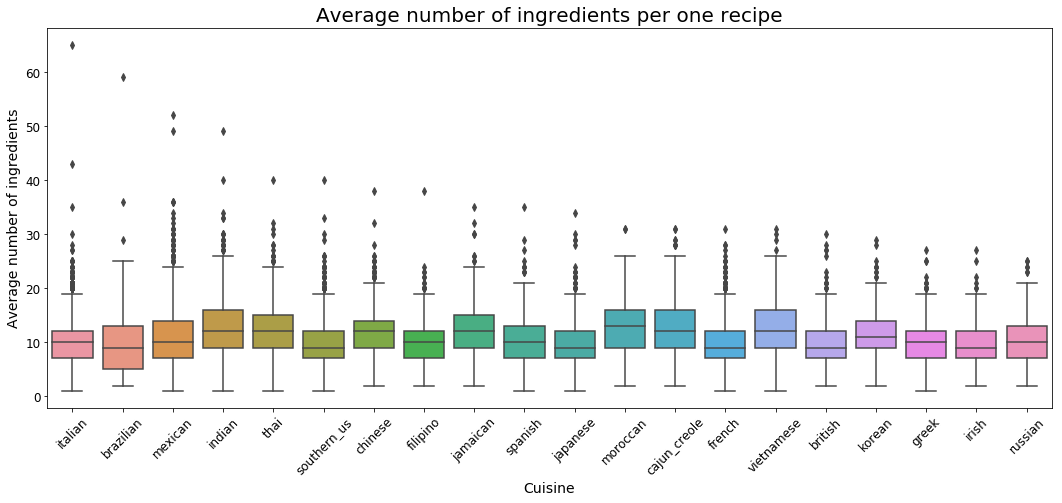

In [15]:
plt.figure(figsize=(18,7))

ax = sns.boxplot(x = df_train['cuisine'], y = df_train['number_of_ingred'])
plt.xticks(rotation = 45, size = 12)
plt.xlabel('Cuisine', size = 14)
plt.yticks(size = 12)
plt.ylabel('Average number of ingredients', size = 14)

plt.title('Average number of ingredients per one recipe', size = 20)

### The most ingredients per one recipe is needed to prepare moroccan indian and vietnamese food. The least is needed for southern, brazilian and irish food.

In [16]:
### Number of unique ingredients per cuisine ###

dictCuisineIngred = {}
cuisines = []
ingredients = []

for i in range(len(df_train)):
    cuisine = df_train['cuisine'][i]
    ingredientsPerCuisine = df_train['ingredients'][i]
    
    if cuisine not in dictCuisineIngred.keys():
        cuisines.append(cuisine)
        dictCuisineIngred[cuisine] = ingredientsPerCuisine
    else: 
        ingredList = dictCuisineIngred[cuisine]
        ingredList.extend(ingredientsPerCuisine)
        ingredList = list(set(ingredList))
        dictCuisineIngred[cuisine] = ingredList

        ingredients.extend(ingredientsPerCuisine)

In [17]:
dictNunberOfIngred = {}

for cuisine in list(dictCuisineIngred.keys()):
    dictNunberOfIngred[cuisine] = len(dictCuisineIngred[cuisine])

df_number_of_inger = pd.DataFrame.from_dict(dictNunberOfIngred, orient='index', columns = ['no of ingred.']).reset_index().rename(columns={'index':'cuisine'})
df_number_of_inger = df_number_of_inger.sort_values('no of ingred.', ascending=False)

Text(0.5, 1.0, 'Number of unique ingredients per cuisine')

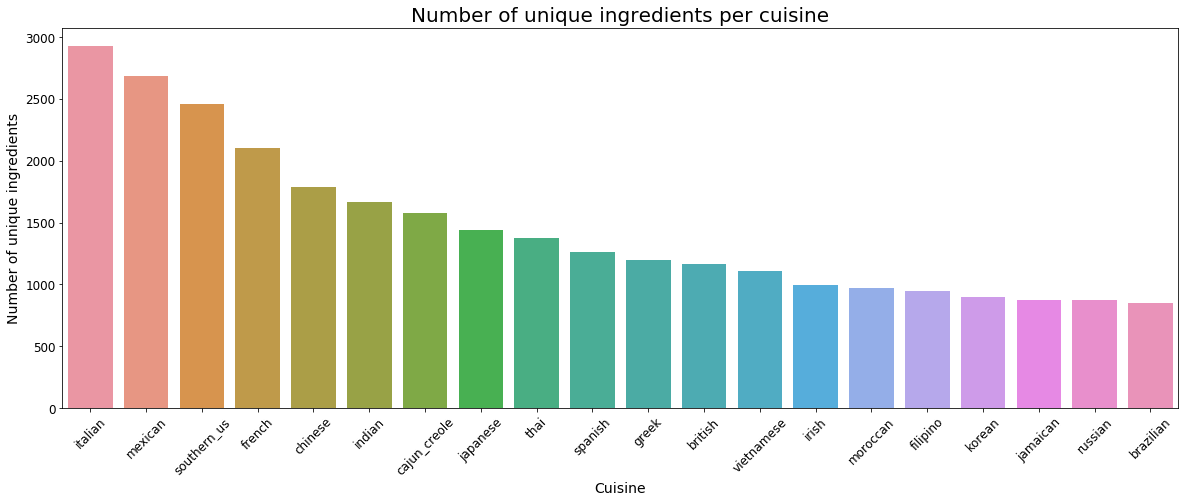

In [18]:
plt.figure(figsize=(20,7))

ax = sns.barplot(x = df_number_of_inger['cuisine'], y = df_number_of_inger['no of ingred.'])
plt.xticks(rotation = 45, size = 12)
plt.xlabel('Cuisine', size = 14)
plt.yticks(size = 12)
plt.ylabel('Number of unique ingredients', size = 14)

plt.title('Number of unique ingredients per cuisine', size = 20)

### Italian, mexican and southern_us cuisine have the most unique ingredients used in recipes. It means that their food is very diversified. On the other hand Jamaican, russian and brazilian cuisine had the least unique ingredients.

# Most popular ingredients

In [19]:
## Main ingredients used in recipes ## 

df_train['ingredients_string'] = [' , '.join(z).strip() for z in df_train['ingredients']] 
df_test['ingredients_string'] = [' , '.join(z).strip() for z in df_test['ingredients']]  

df_train.head()

,cuisine,id,ingredients,number_of_ingred,ingredients_string
15289,italian,3885,"[fettucine, fresh marjoram, minced garlic, oli...",65,"fettucine , fresh marjoram , minced garlic , o..."
30350,brazilian,13430,"[marshmallows, fresh corn, cheddar cheese, shr...",59,"marshmallows , fresh corn , cheddar cheese , s..."
26103,mexican,13049,"[vanilla ice cream, lime, garlic powder, zucch...",52,"vanilla ice cream , lime , garlic powder , zuc..."
10513,mexican,49282,"[condensed cream of chicken soup, pepper, refr...",49,"condensed cream of chicken soup , pepper , ref..."
22906,indian,2253,"[white vinegar, sparkling lemonade, coconut su...",49,"white vinegar , sparkling lemonade , coconut s..."


In [20]:
dff_train = df_train.set_index(['cuisine', 'id'])['ingredients'].apply(pd.Series).stack()
dff_train = dff_train.reset_index()
dff_train.columns = ['cuisine','id','ingred_id','ingredients']

dff_train.head()

,cuisine,id,ingred_id,ingredients
0,italian,3885,0,fettucine
1,italian,3885,1,fresh marjoram
2,italian,3885,2,minced garlic
3,italian,3885,3,olive oil
4,italian,3885,4,garlic powder


In [21]:
df_ingredients = dff_train.groupby('ingredients').count()
df_ingredients = df_ingredients['ingred_id'].reset_index().rename(columns = {"ingred_id": "recipes"})
df_ingredients['%_of_all_recipes'] = 100 * df_ingredients['recipes'] / df_ingredients['recipes'].sum()
df_ingredients_top = df_ingredients.sort_values('recipes', ascending = False).head(20)

Text(0.5, 1.0, '20 most commmon ingredients')

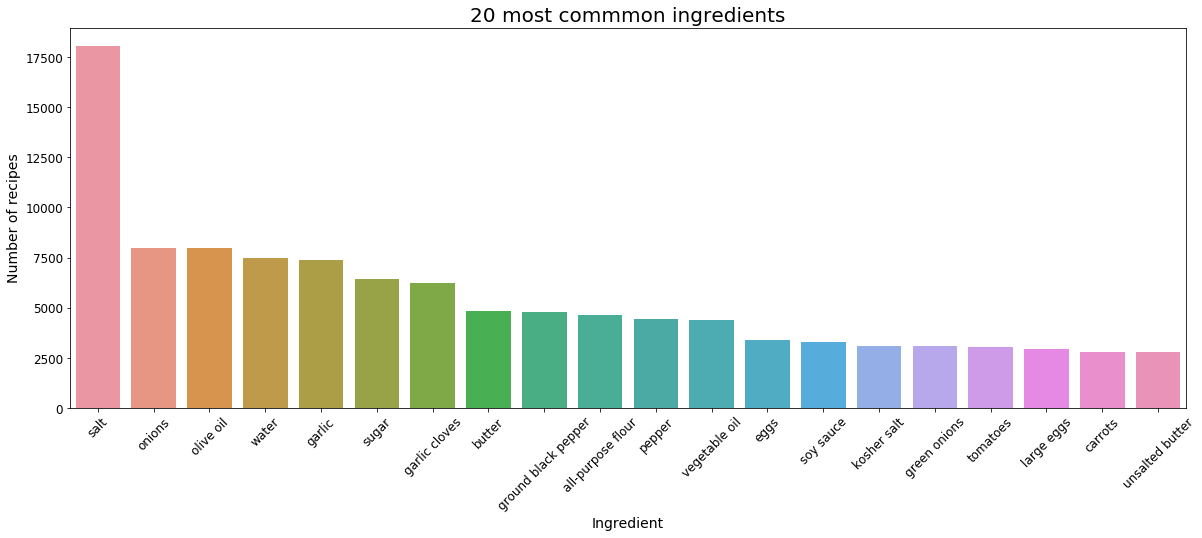

In [22]:
plt.figure(figsize = (20,7))

ax = sns.barplot(x = df_ingredients_top['ingredients'], y = df_ingredients_top['recipes'])
plt.xticks(rotation = 45, size = 12)
plt.xlabel('Ingredient', size = 14)
plt.yticks(size = 12)
plt.ylabel('Number of recipes', size = 14)

plt.title('20 most commmon ingredients', size = 20)

In [23]:
dummies = pd.get_dummies(dff_train['ingredients'])
df_dummies = pd.concat([dff_train, dummies], axis = 1)
df_dummies = df_dummies.drop(columns = ['ingred_id', 'ingredients'], axis=1)
df_dummies = df_dummies.drop_duplicates(keep = 'first', inplace=False)

df_dummies.head()

,cuisine,id,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,italian,3885,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,italian,3885,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,italian,3885,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,italian,3885,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,italian,3885,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_top_grouped = df_dummies.groupby(['cuisine','id']).sum().reset_index()
df_top_grouped.head()

,cuisine,id,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,brazilian,203,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brazilian,415,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brazilian,550,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brazilian,605,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brazilian,623,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_top_grouped_cuisine = df_top_grouped.groupby(['cuisine']).sum().drop(['id'], axis=1)
df_top_grouped_cuisine.head()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
cuisine,,,,,,,,,,,,,,,,,,,,,
brazilian,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
british,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
cajun_creole,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0
chinese,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,30.0,0.0
filipino,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0


In [26]:
cuisines = []

for c in df_top_grouped_cuisine.index:
    cuisines.append(c)

In [27]:
ingredients_in_cuisine = df_ingredients.set_index('ingredients').drop(['recipes', '%_of_all_recipes'], axis=1)

for cusine in cuisines:
    df_cuisine = df_top_grouped_cuisine.loc[cusine].to_frame()
    ingredients_in_cuisine = pd.concat([ingredients_in_cuisine, df_cuisine], axis=1, sort=False)
    
ingredients_in_cuisine.head()

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
ingredients,,,,,,,,,,,,,,,,,,,,
( oz.) tomato sauce,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
( oz.) tomato paste,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
(10 oz.) frozen chopped spinach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(10 oz.) frozen chopped spinach, thawed and squeezed dry",0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
(14 oz.) sweetened condensed milk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
ingredients_in_cuisine['#_of_cuisines'] = ingredients_in_cuisine.apply(lambda x: x.astype(bool).sum(), axis = 'columns')
unique_ingredients = ingredients_in_cuisine[ingredients_in_cuisine['#_of_cuisines'] == 1]
unique_ingredients.head()

,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,irish,italian,...,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese,#_of_cuisines
ingredients,,,,,,,,,,,,,,,,,,,,,
(10 oz.) frozen chopped spinach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
(15 oz.) refried beans,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1
"2 1/2 to 3 lb. chicken, cut into serving pieces",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2% low fat cheddar chees,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2% lowfat greek yogurt,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


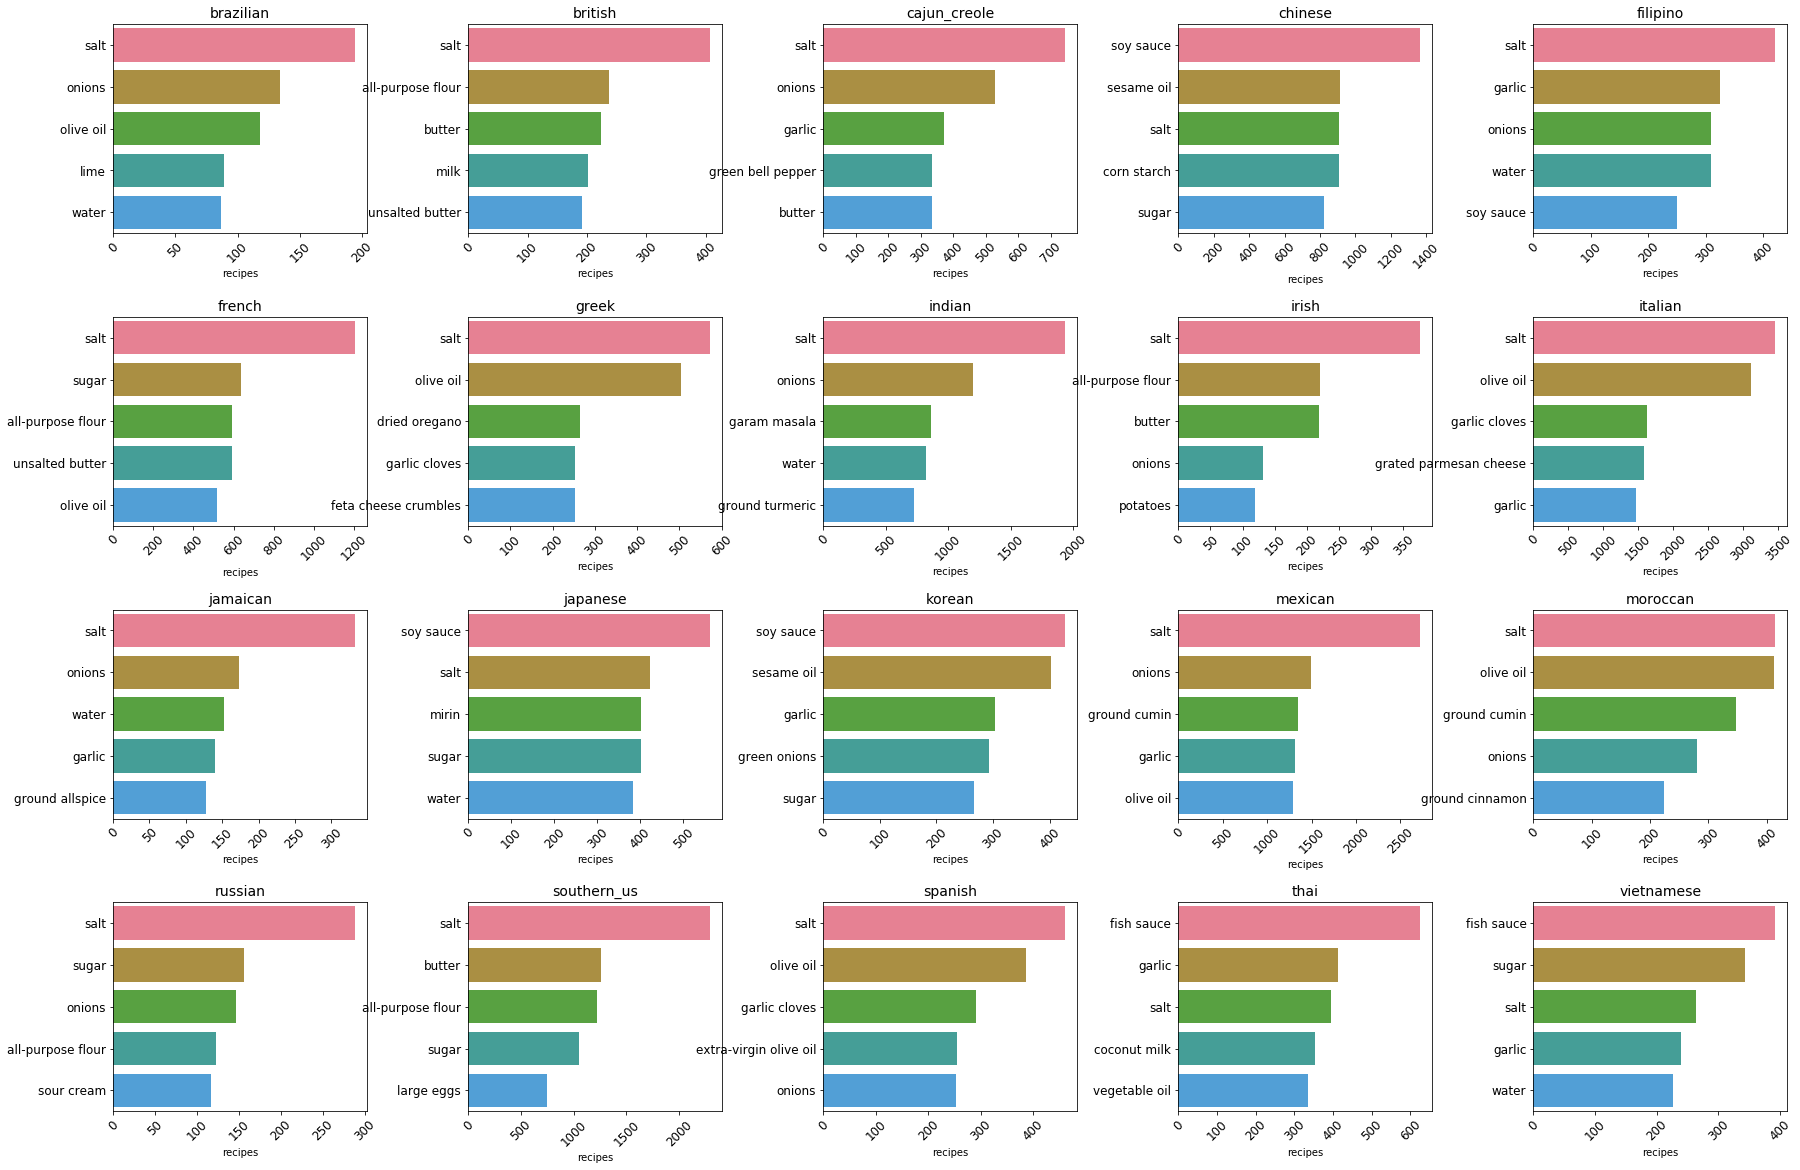

In [29]:
sns.set_palette('husl')
i = 1
fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(hspace = 0.4, wspace=0.4)

for cusine in cuisines:
    ingred = ingredients_in_cuisine[cusine].to_frame()
    ingred = ingred[ingred[cusine] > 0].sort_values(cusine, ascending = False).head(5).reset_index()
    
    plt.subplot(4, 5, i)

    ax = sns.barplot(y = ingred['ingredients'], x = ingred[cusine])
    plt.xticks(rotation = 45, size = 12)
    plt.xlabel('recipes')
    plt.yticks(size = 12)
    plt.ylabel('')

    plt.title(cusine, size = 14)
    i += 1
            
# print(ingred)

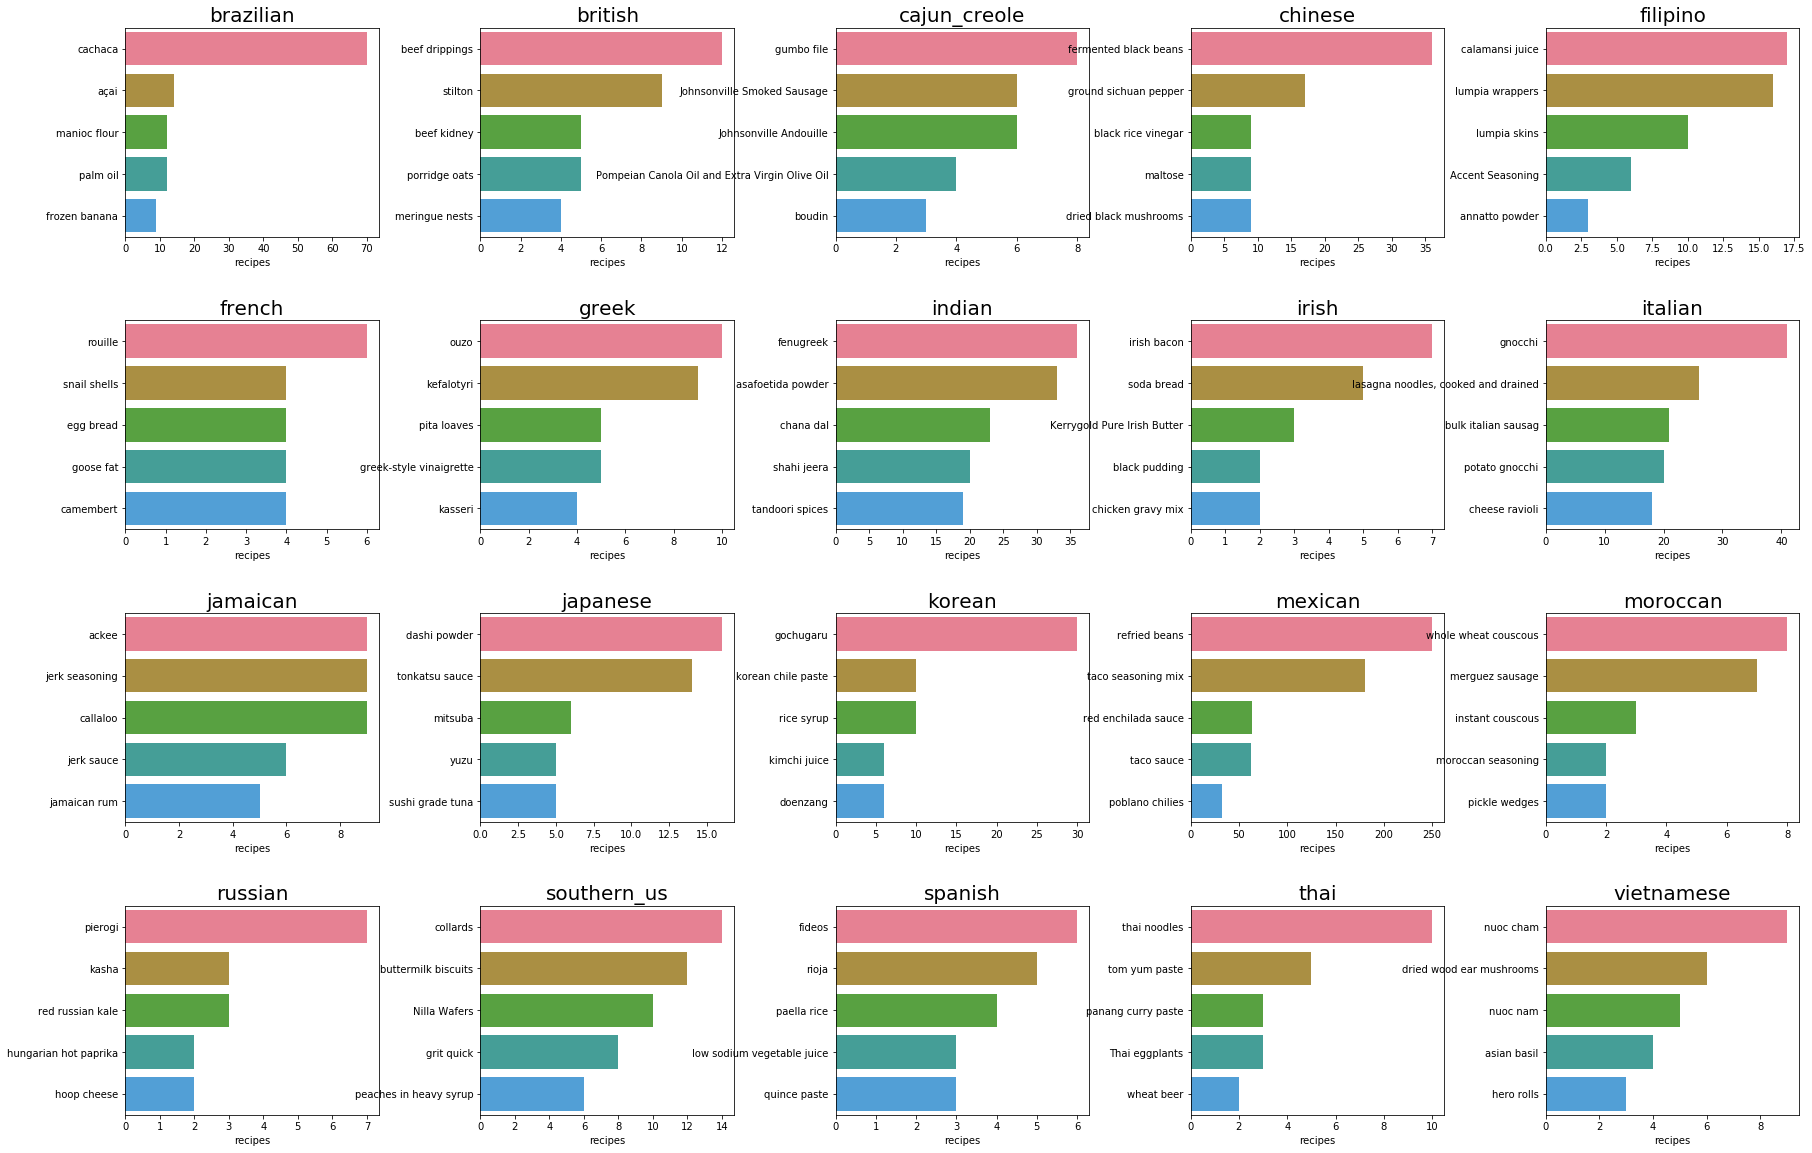

In [30]:
sns.set_palette('husl')
i = 1
fig = plt.figure(figsize=(30, 20))
fig.subplots_adjust(hspace = 0.4, wspace=0.4)

for cusine in cuisines:
    ingred = unique_ingredients[cusine].to_frame()
    ingred = ingred[ingred[cusine] > 0].sort_values(cusine, ascending = False).head(5).reset_index()
    
    plt.subplot(4, 5, i)
    
    ax = sns.barplot(y = ingred['ingredients'], x = ingred[cusine])
    plt.xlabel('recipes')
    plt.ylabel('')

    plt.title(cusine, size = 20)
    i += 1
    
# print(ingred)

# Analysis 

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [32]:
vect = TfidfVectorizer(binary=True).fit(df_train['ingredients_string'].values)

X_train_vectorized = vect.transform(df_train['ingredients_string'].values)
X_train_vectorized = X_train_vectorized.astype('float')

test_transformed = vect.transform(df_test['ingredients_string'].values)
test_transformed = test_transformed.astype('float')

In [33]:
encoder = LabelEncoder()
y_transformed = encoder.fit_transform(df_train.cuisine)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized, y_transformed , random_state = 0)

In [35]:
model = SVC(
    C=10,
    kernel='rbf',
    gamma=1.2,
    coef0=1,
    cache_size=200,
)
classifier = OneVsRestClassifier(model, n_jobs=-1)
classifier.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma=1.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=-1)

In [36]:
y_pred = encoder.inverse_transform(classifier.predict(X_train))
y_true = encoder.inverse_transform(y_train)

In [37]:
print(f'Accuracy score on train data: {accuracy_score(y_true, y_pred)}')

Accuracy score on train data: 0.9995306738183037


In [84]:
print(df_train['ingredients_string'][99])

balsamic vinegar , low salt chicken broth , dijon mustard , corn starch , dried basil , garlic cloves , white wine vinegar


In [85]:
y_true[99]

'korean'